In [1]:
%run Common.ipynb

%matplotlib inline
        
def fit_predict_and_plot(clf, train_data, train_labels, test_data, test_labels, class_names):
    clf.fit(train_data, train_labels)

    prob = clf.predict_proba(test_data)
    pred = clf.predict(test_data)

    fpr, tpr, _ = roc_curve(test_labels, prob[:,1])

    plot_roc(fpr, tpr)
    
    cnf_matrix = confusion_matrix(test_labels, pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')
    
    print_scores(test_labels, pred)
    
    return clf

<h3>Load binary-classified dataset and reduced dataset from Question 4</h3>

In [4]:
import pickle

with open('train_lemmatized_2.pickle', 'rb') as handle:
    train_ds = pickle.load(handle)
    
with open('test_lemmatized_2.pickle', 'rb') as handle:
    test_ds = pickle.load(handle)
    
with open('train_lsi.pickle', 'rb') as handle:
    train_lsi = pickle.load(handle)
    
with open('test_lsi.pickle', 'rb') as handle:
    test_lsi = pickle.load(handle)

In [5]:
print("Train shape: %s" %str(train_lsi.shape))
print("Test shape: %s" %str(test_lsi.shape))

Train shape: (4732, 50)
Test shape: (3150, 50)


In [6]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

<h3>Q5 Logistic Classifier with Default Values</h3>

Confusion matrix, without normalization
[[1480   80]
 [  35 1555]]
Normalized confusion matrix
[[0.95 0.05]
 [0.02 0.98]]
accuracy:0.9634920634920635
precision:0.9510703363914373
recall:0.9779874213836478
f1:0.9643410852713178


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

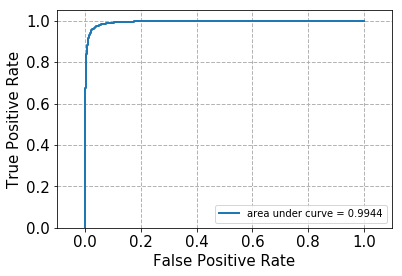

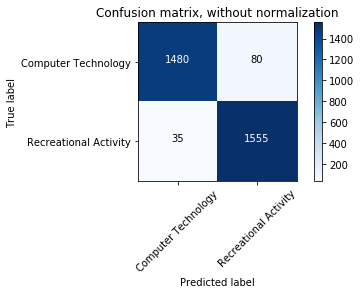

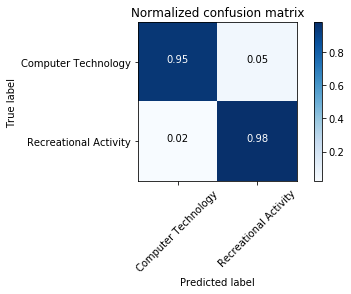

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
fit_predict_and_plot(clf, train_lsi, train_ds.target, test_lsi, test_ds.target, train_ds.target_names)

<h3>Logistic Regression without regularization</h3>

In [21]:
clf_noreg = LogisticRegression(C=1e100, penalty='l1')
clf_noreg.fit(train_lsi, train_ds.target)
print_scores(clf_noreg.predict(train_lsi), train_ds.target)

accuracy:0.977810650887574
precision:0.9765592298032649
recall:0.9794290512174643
f1:0.9779920352127437


<h3>Logistic Regression with L1 regularization</h3>

In [24]:
clf_scores = {}
for k in log_progress(range(-3, 4)):
    clf = LogisticRegression(C=10**k, penalty='l1')
    scores = cross_val_score(clf, train_lsi, train_ds.target, cv=cv, scoring='accuracy')
    print("k=%d: %f" %(k, scores.mean()))
    clf_scores[k] = scores.mean()

VBox(children=(HTML(value=''), IntProgress(value=0, max=7)))

k=-3: 0.495493
k=-2: 0.495493
k=-1: 0.959014
k=0: 0.972535
k=1: 0.975915
k=2: 0.975352
k=3: 0.974930


In [26]:
best_k_l1 = max(clf_scores, key=clf_scores.get)
print("Best k with L1 regulation: %d (score = %f)" %(best_k_l1, clf_scores[best_k_l1]))

Best k with L1 regulation: 1 (score = 0.975915)


<h3>Logistic Regression with L2 regularization</h3>

In [25]:
clfs = {}
clf_scores = {}
for k in log_progress(range(-3, 4)):
    clfs[k] = LogisticRegression(C=10**k, penalty='l2')
    scores = cross_val_score(clfs[k], train_lsi, train_ds.target, cv=cv, scoring='accuracy')
    print("k=%d: %f" %(k, scores.mean()))
    clf_scores[k] = scores.mean()

VBox(children=(HTML(value=''), IntProgress(value=0, max=7)))

k=-3: 0.698028
k=-2: 0.900282
k=-1: 0.967887
k=0: 0.974648
k=1: 0.975915
k=2: 0.975775
k=3: 0.975352


In [27]:
best_k_l2 = max(clf_scores, key=clf_scores.get)
best_clf_l2 = clfs[best_k_l2]
print("Best k with L2 regulation: %d (score = %f)" %(best_k_l2, clf_scores[best_k_l2]))

Best k with L2 regulation: 1 (score = 0.975915)


<h3>Compare the performance (accuracy, precision, recall and F-1 score) of 3 logistic classifiers: w/o regularization, w/ L1 regularization and w/ L2 regularization, using test data.</h3>

<h3>Without Regularization</h3>

In [22]:
print_scores(clf_noreg.predict(test_lsi), test_ds.target)

accuracy:0.9695238095238096
precision:0.9779874213836478
recall:0.9622524752475248
f1:0.9700561447286339


In [89]:
np.set_printoptions(suppress=True)
clf_noreg.coef_

array([[-15.6 , 150.08,   0.04,  78.44,  30.5 , -45.19, -19.69,   8.96,
         16.07,  -9.15,   6.88,  16.43, -21.15,   0.63,  -1.78, -11.65,
         12.08,  -8.14,   2.42,   2.84,  -1.77,   4.08,   0.52,  33.13,
         -4.41,   2.61,  -0.46,  -6.  ,   8.67,  -8.15,   4.94,  10.62,
        -11.43, -14.26,  14.62, -11.72,   7.76,   6.79,  -2.89,  -5.71,
         13.06, -10.04,  -7.3 ,   5.43,  12.26,  12.57,   2.83,  -8.  ,
         -5.52,   4.88]])

<h3>L1 Regularization</h3>

In [90]:
best_clf_l1 = LogisticRegression(C=10**best_k_l1, penalty='l1')
best_clf_l1.fit(train_lsi, train_ds.target)
print_scores(best_clf_l1.predict(test_lsi), test_ds.target)

accuracy:0.9695238095238096
precision:0.9792452830188679
recall:0.9611111111111111
f1:0.9700934579439253


In [91]:
best_clf_l1.coef_

array([[-11.09, 129.7 ,   0.  ,  64.85,  24.6 , -35.  , -15.48,   7.27,
         11.36,  -5.61,   3.32,  13.03, -14.71,   0.89,  -1.65,  -7.74,
         10.02,  -5.06,   0.  ,   0.77,  -0.12,   3.28,   0.  ,  27.23,
         -0.38,   0.  ,   0.  ,  -4.83,   5.07,  -6.39,   2.9 ,   8.81,
         -7.26, -10.9 ,  11.58,  -9.42,   3.86,   5.43,  -1.26,  -3.24,
          9.68,  -7.32,  -4.3 ,   2.54,   8.33,   7.83,   2.11,  -4.54,
         -2.65,   3.81]])

<h3>L2 Regularization</h3>

In [98]:
best_clf_l2 = LogisticRegression(C=10**best_k_l2, penalty='l2')
best_clf_l2.fit(train_lsi, train_ds.target)
print_scores(best_clf_l2.predict(test_lsi), test_ds.target)

accuracy:0.9682539682539683
precision:0.9811320754716981
recall:0.9570552147239264
f1:0.968944099378882


In [99]:
best_clf_l2.coef_

array([[-2.24, 53.88,  3.47, 26.99,  9.32, -9.73, -6.77,  4.31,  6.19,
        -6.21,  6.59,  7.04, -7.97,  5.07, -3.09, -4.63,  3.77, -3.47,
         2.26, -0.39, -0.58,  3.78, -0.82,  8.65,  0.62, -3.07, -2.04,
        -3.88,  1.39, -2.32,  1.29,  2.65, -2.  , -1.76,  3.5 , -5.53,
         1.34,  2.59, -1.62, -1.94,  4.96, -1.38, -2.81,  0.29,  2.53,
         1.04,  1.74, -2.15, -0.03,  1.95]])

<h3>How does the regularization parameter affect the test error? How are the learnt coefficients affected? Why might one be interested in each type of regularization?</h3>

<p>We can see that large values of C give more freedom to the model. Conversely, smaller values of C constrain the model more. In the L1 penalty case, this leads to sparser solutions.</p>
<p>http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py</p>

<p>A logistic regression with L1 penalty yields sparse models, and can thus be used to perform feature selection.</p>

<p>Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero.</p>
   <p>With SVMs and logistic-regression, the parameter C controls the sparsity: the smaller C the fewer features selected. With Lasso, the higher the alpha parameter, the fewer features selected.</p>
   <p>http://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection</p>